In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np 
from visibility_graph import visibility_graph
import networkx as nx
import statsmodels.api as sm
import os

ruta = '../Var/'
title = 'Var'
edge = '../Var/edgeList/'


if not os.path.exists(ruta):
    os.makedirs(ruta)

if not os.path.exists(edge):
    os.makedirs(edge)

In [2]:
def lista0 (lista1, lista2):
    while 0 in lista1:
        lista2.pop(lista1.index(0))
        lista1.remove(0)
    return lista1, lista2 

def get_alpha(route,id, li_fit, ls_fit, xlimi, xlims, color, name):
    
    data = f'{route}{id}'
    routeSaved = f'{route}pdf_{title}/'

    if not os.path.exists(routeSaved):
        os.makedirs(routeSaved)

    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    # Plot degree distribution
    a=np.linspace(li_fit,ls_fit,10)
    

    plt.figure(figsize=(6,4))
    plt.plot(x0,y0,color=color,linewidth=0,marker="P",markersize=5,label="data")
    plt.plot(a,(a)*(model.params[1])+model.params[0]*1.,color="k",lw=3,label=r"fit ($\alpha_0={}$)".format(-np.round(model.params[1],2)))
    plt.xlabel(r'$\log_{10}(k)$ (Degree)'); plt.ylabel(r'$\log_{10} P(k)$'); plt.title('Degree Distribution {}'.format(name)); plt.legend(); plt.xlim(xlimi,xlims)
    plt.legend(title=r"$P(k)\sim x^{-\alpha_0}$"); plt.grid(alpha=0.5)
    plt.savefig(routeSaved+f'{id}.pdf',dpi=400,bbox_inches='tight')
    plt.show()

    return

In [3]:
var = pd.read_csv(f'../transients/{title}.csv')
var

,Classification,ID,observation_id,Mag,Magerr,MJD
0,Var,1306201260664112997,265040,15.0347,0.058482,55679.375230
1,Var,1306201260664112997,265038,14.9668,0.058076,55659.299490
2,Var,1306201260664112997,265036,14.9718,0.058105,55659.284277
3,Var,1306201260664112997,265047,14.7411,0.057327,55724.286649
4,Var,1306201260664112997,265035,14.9877,0.058199,55659.276745
...,...,...,...,...,...,...
3840,Var,1102121070724106436,249923,14.5877,0.056115,56393.316437
3841,Var,1102121070724106436,249925,14.1136,0.053478,56413.348405
3842,Var,1102121070724106436,249926,14.1249,0.053535,56413.355813
3843,Var,1102121070724106436,249902,13.9284,0.053691,56328.475033


In [13]:
ids = list(var['ID'].unique())
print(len(list(var['ID'].unique())))
var['ID'].unique()


11


array([1306201260664112997,  910261230034129795, 1001131320174130050,
       1409301150184108915,  906011070884121382, 1410301120434103505,
       1102081010244125249,  909191290184139269, 1305121090884136789,
       1102121070724106436, 1002161320174102834], dtype=int64)

##### Función para hacer los datos

In [5]:
idx = [1410301120434103505, 1102081010244125249, 1102121070724106436, 1409301150184108915, ]
for i in idx:
    print('id: ', list(var['ID'].unique()).index(i))

id:  5
id:  6
id:  9
id:  3


In [6]:
#funcion que haga eso de forma automatica

def edgelist(id):

    vec_id = var[var['ID'] == id]['Mag']
    graph_id = visibility_graph(vec_id)
    nx.write_edgelist(graph_id, f'{ruta}edgeList/{id}')


#### Indices de los id's a probar (sacado aleatoreamente)

id1 = 5

id2 = 6

id3 = 9

id4 = 3

id5 = 2


In [7]:
ids_group = [1306201260664112997,  910261230034129795, 1001131320174130050,
       1409301150184108915,  906011070884121382, 1410301120434103505,
       1102081010244125249,  909191290184139269, 1305121090884136789,
       1102121070724106436, 1002161320174102834]

""" id1 = 1410301120434103505
id2 = 1102081010244125249
id3 = 1102121070724106436
id4 = 1409301150184108915
id5 = 1001131320174130050


edgelist(id1)
edgelist(id2)
edgelist(id3)
edgelist(id4)
edgelist(id5) """

for _ in ids:
    edgelist(_)

In [8]:
def get_alpha_data(route,id, li_fit, ls_fit, name):
    
    data = f'{edge}{id}'
    
    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    alpha = -np.round(model.params[1],2)
    values = [name,id,alpha]
    
    return values

In [9]:
values = []
for id in ids:
    values.append(get_alpha_data(edge, id, 0.743, 1.425, 'Var')) 

print(values)

[['Var', 1306201260664112997, 2.24], ['Var', 910261230034129795, 2.56], ['Var', 1001131320174130050, 2.61], ['Var', 1409301150184108915, 2.54], ['Var', 906011070884121382, 2.1], ['Var', 1410301120434103505, 2.62], ['Var', 1102081010244125249, 2.28], ['Var', 909191290184139269, 2.36], ['Var', 1305121090884136789, 2.01], ['Var', 1102121070724106436, 2.22], ['Var', 1002161320174102834, 2.5]]


In [10]:
import csv 

ruta = '../resultados/prueba.csv'

with open (ruta, mode = 'a', newline = '') as archivo: 
    writer = csv.writer(archivo)

    writer.writerows(values)
    pass

In [ ]:
values_min = [0.70, 0.79, 0.78, 0.74, 0.79, 0.81, 0.74, 0.71, 0.72, 0.66, 0.73]
values_max = [1.38, 1.38, 1.41, 1.42, 1.47, 1.32, 1.46, 1.46, 1.51, 1.45, 1.42]
values_alpha = [2.38, 2.61, 2.61, 2.54, 2.16, 3.09, 2.31, 2.39, 1.95, 2.3, 2.5]

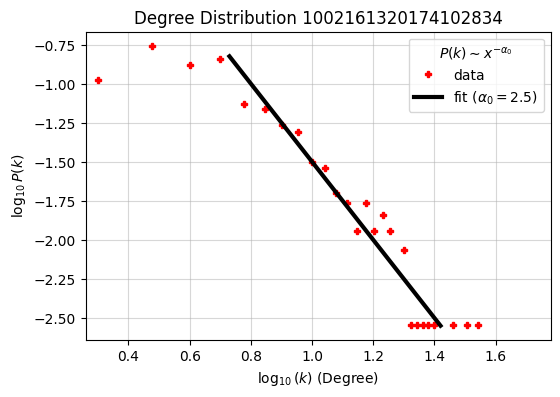

In [75]:
get_alpha(ruta, ids_group[10], 0.73, 1.42,0.26,1.78, "red", ids_group[10])

#### PRUEBA 1 $\rightarrow$ Var

ID: 1410301120434103505

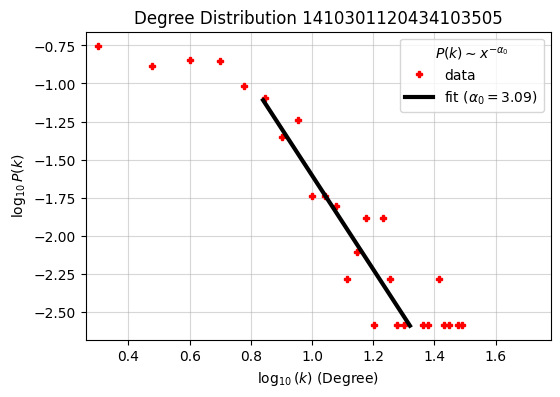

In [8]:
#0.85 & 1.34 -> 3.0
#otra opcion: 0.65  & 1.43 -> 2.32 [posible ganadora]
#otra (no creo tanto): 0.72 & 1.42 -> 2.4

# get_alpha(ruta, id1, 0.84,1.32,0.26,1.78, "red", id1)


#### PRUEBA 2 $\rightarrow$ Var

ID: 1102081010244125249

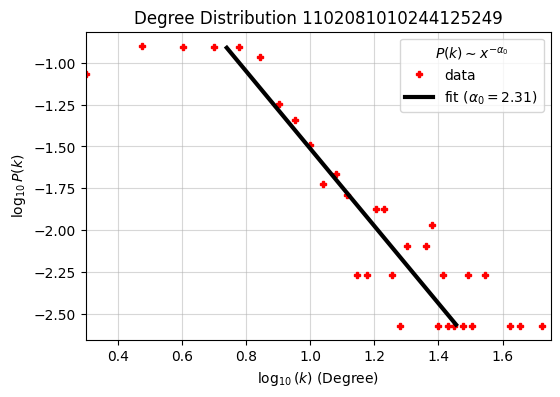

In [9]:
#0.85 & 1.34 -> 1.58
#otra opcion: 0.65  & 1.398 -> 2.19 [posible ganadora]
#otra: 0.695 & 1.398 -> 2.19 [mismo pero mejor]

# get_alpha(ruta,id2,0.74,1.455,0.3,1.75, "red", id2)

#### PRUEBA 3 $\rightarrow$ Var

ID: 1102121070724106436

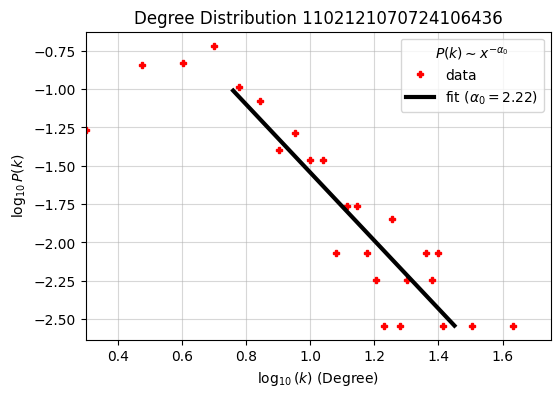

In [10]:

get_alpha(ruta, ids_group[9], 0.66, 1.45,0.26,1.78, "red", ids_group[9])
# get_alpha(ruta,id3,0.76,1.45,0.3,1.75, "red", id3)

#### PRUEBA 4 $\rightarrow$ Var

ID: 1409301150184108915

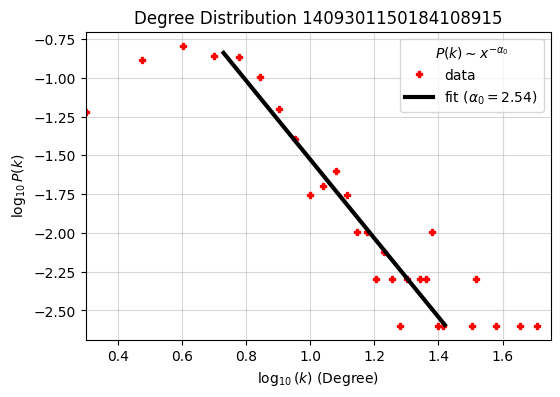

In [11]:

#dudo un poco 

# get_alpha(ruta,id4,0.73,1.42,0.3,1.75, "red", id4)

#### PRUEBA 5 $\rightarrow$ Var

ID: 1001131320174130050

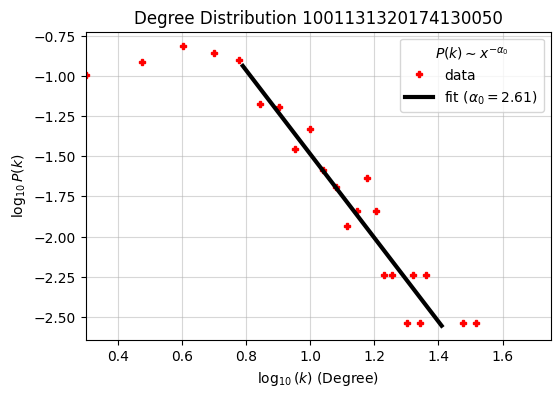

In [12]:


# get_alpha(ruta,id5,0.79,1.41,0.3,1.75, "red", id5)